# This noetbook counts the number of occurances for each gene across all 13 cancer types

In [64]:
from graphdriver.load import labels
from graphdriver.commons import setup
import matplotlib.pyplot as plt
import numpy as np


In [2]:
cancer = 'brca'
df_bailey_cancer, df_bailey_others = labels._load_bailey(cancer)
df_cosmic_cancer, df_cosmic_others = labels._load_cosmic(cancer)
drivers_cancer = df_bailey_cancer.index.unique().append(df_cosmic_cancer.index.unique())

In [19]:
df_driver_total = None
for cancer in setup.cancer_types():
    df_bailey_cancer, df_bailey_others = labels._load_bailey(cancer)
    df_cosmic_cancer, df_cosmic_others = labels._load_cosmic(cancer)
    drivers_cancer = df_bailey_cancer.index.unique().append(df_cosmic_cancer.index.unique())
    if df_driver_total is None:
        df_driver_total = drivers_cancer.unique().copy()
    else:
        df_driver_total = df_driver_total.append(drivers_cancer.unique())


In [53]:
driver_occurances = df_driver_total.value_counts().to_list()
index = df_driver_total.value_counts().value_counts().index.to_list()
values = df_driver_total.value_counts().value_counts().to_list()

values[3] = sum(values[3:])
values = values[:4]
index[3]=">3"
index = index[:4]

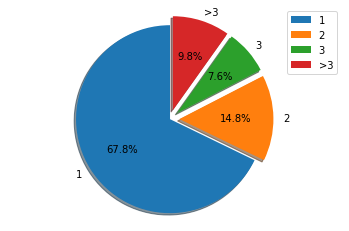

In [63]:
fig1, ax1 = plt.subplots()
myexplode = [0, 0.1, 0.1, 0.1]
ax1.pie(values, labels=index, explode=myexplode, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend()
plt.savefig('labels-pos-occurances.pgf')
plt.show()

In [71]:
driver_occurances = df_driver_total.value_counts().to_list()
print(np.mean(driver_occurances))
print(np.std(driver_occurances))

1.8598484848484849
1.8604886881841929
